In [2]:
import pandas as pd
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns

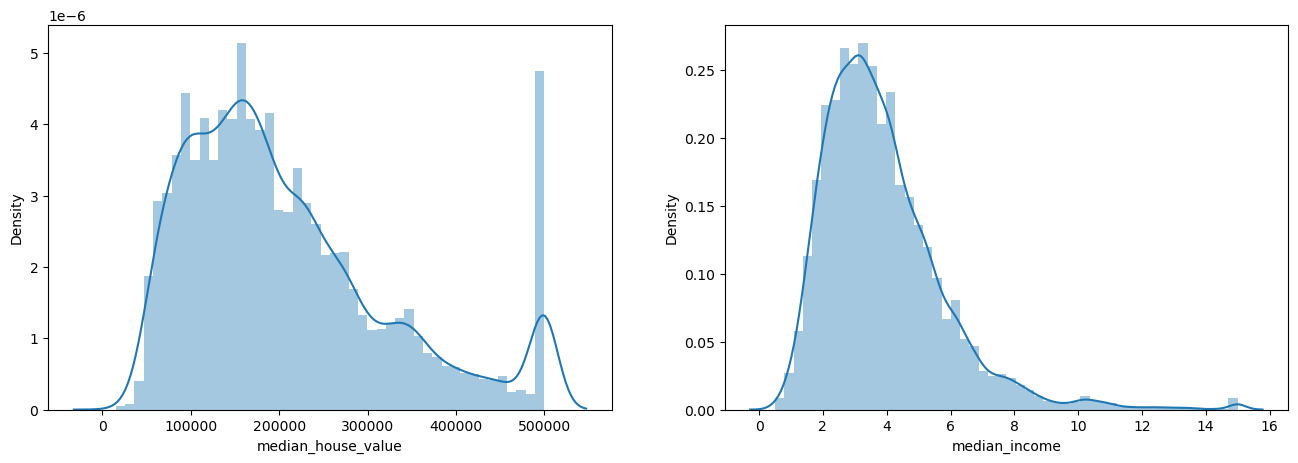

<Axes: ylabel='median_house_value'>

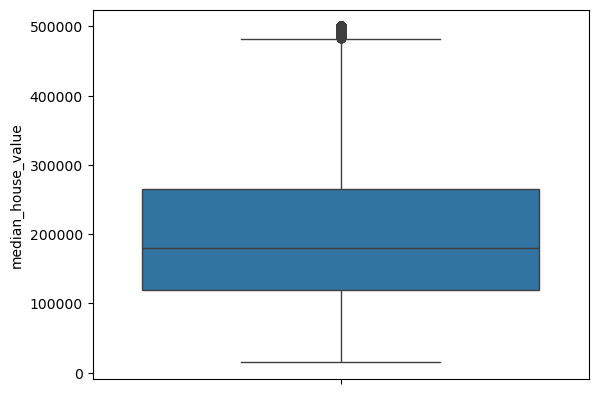

In [3]:
df = pd.read_csv(r'C:\Users\VICTUS\Downloads\housing\housing.csv')
warnings.filterwarnings('ignore')
deal = 'median_house_value'
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df[deal])
plt.subplot(1,2,2)
sns.distplot(df['median_income'])
plt.show()
sns.boxplot(df[deal])

In [4]:
percentile25 = df[deal].quantile(0.25)
percentile75 = df[deal].quantile(0.75)
per = df[deal].quantile(0.95)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit, lower_limit)

df[df[deal] > upper_limit]
# df[df[deal] < lower_limit]

482412.5 -98087.5


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [5]:
new_df = df[df[deal] < upper_limit]
new_df.shape

(19569, 10)

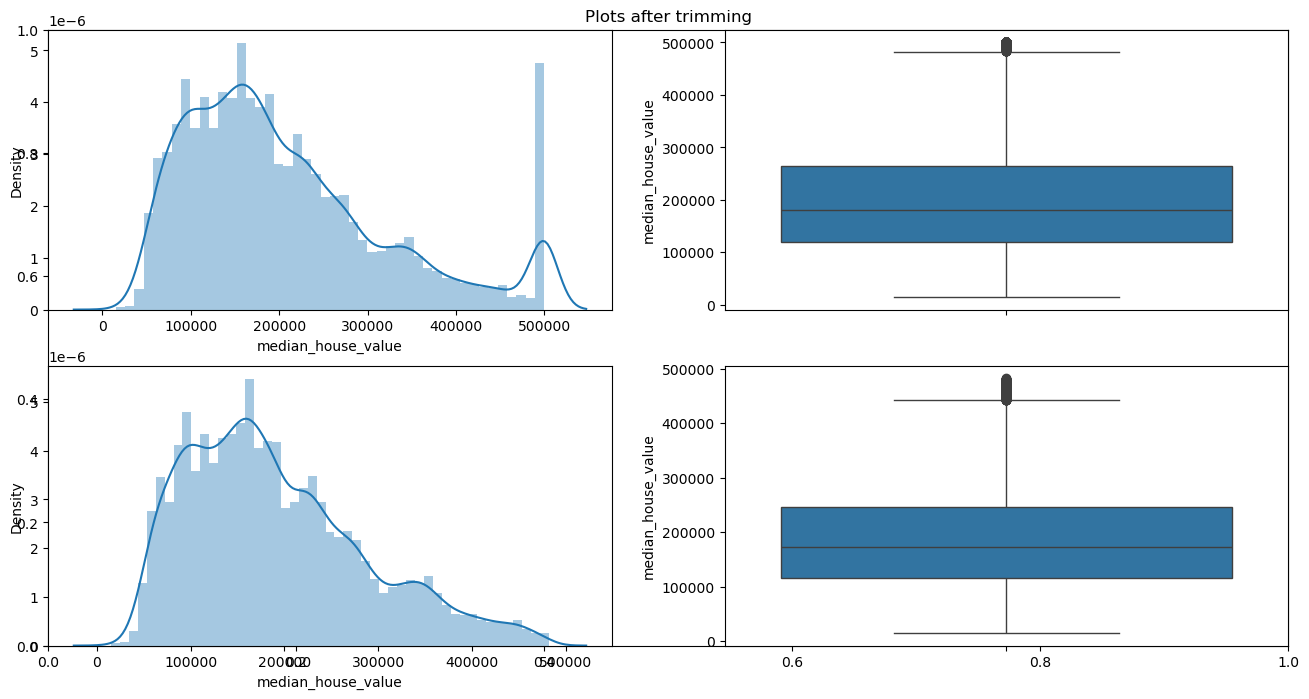

In [6]:
plt.figure(figsize=(16,8))
plt.title('Plots after trimming')
plt.subplot(2,2,1)
sns.distplot(df[deal])
plt.subplot(2,2,2)
sns.boxplot(df[deal])
plt.subplot(2,2,3)
sns.distplot(new_df[deal])
plt.subplot(2,2,4)
sns.boxplot(new_df[deal])
plt.show()

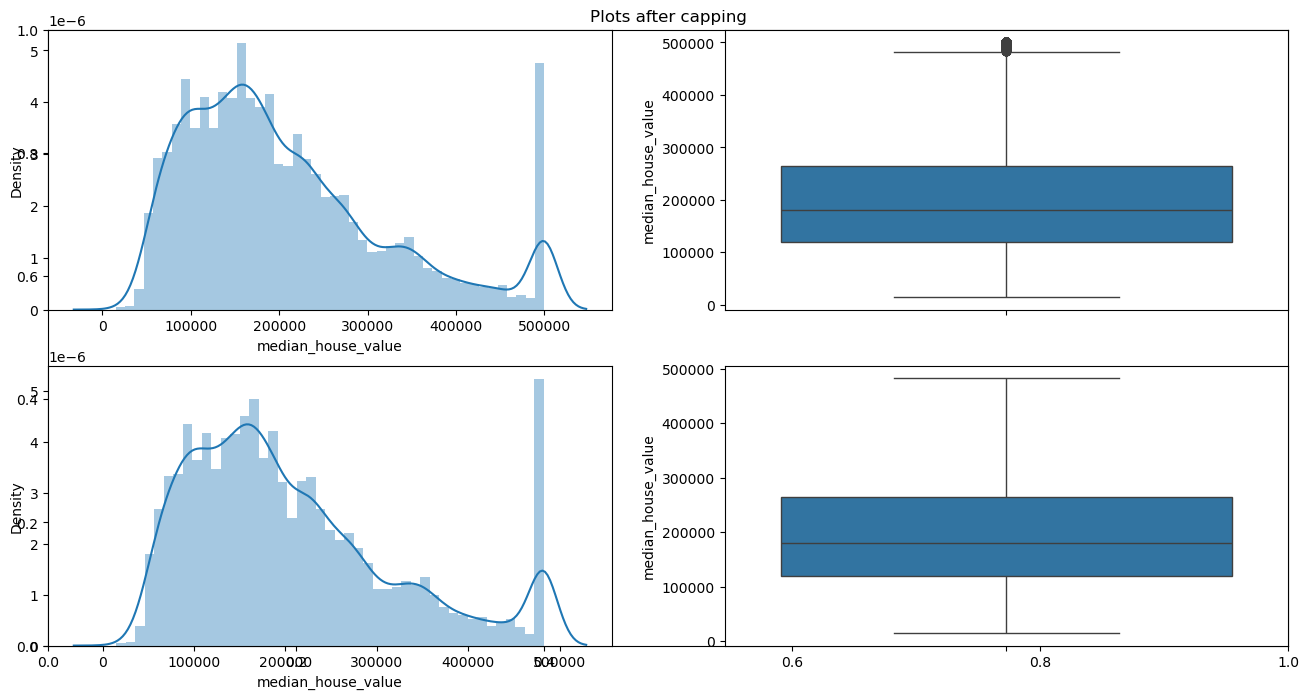

In [7]:
new_df_cap = df.copy()
new_df_cap[deal] = new_df_cap[deal].clip(upper = upper_limit, lower = lower_limit)

plt.figure(figsize=(16,8))
plt.title('Plots after capping')
plt.subplot(2,2,1)
sns.distplot(df[deal])
plt.subplot(2,2,2)
sns.boxplot(df[deal])
plt.subplot(2,2,3)
sns.distplot(new_df_cap[deal])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap[deal])
plt.show()

In [8]:
mean_vals = new_df_cap.groupby('ocean_proximity')['median_house_value'] \
              .transform('mean')
df_imputed = new_df_cap.copy()
df_imputed['ocean_proximity'] = mean_vals

df_dropped = new_df_cap.drop('ocean_proximity', axis=1)

df_model = df_imputed
df_model = df_model.dropna()

X_all = df_model.drop(['median_house_value'], axis=1).values.tolist()
y_all = df_model['median_house_value'].tolist()

test_ratio = 0.2
seed = 42
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_all, y_all, test_size=test_ratio, random_state=seed)

mean_vals.sort_values(ascending=False)
df_imputed.sort_values(by=['ocean_proximity','median_house_value'], ascending = (0,0))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,380440.000000
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,380440.000000
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,380440.000000
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,380440.000000
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,380440.000000
...,...,...,...,...,...,...,...,...,...,...
16186,-121.29,37.95,52.0,107.0,79.0,167.0,53.0,0.7917,22500.0,124728.605709
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,124728.605709
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,124728.605709
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,124728.605709


In [9]:
def normalize(train, test):
    features = list(zip(*train))
    means = [sum(col) / len(col) for col in features]
    stds = [math.sqrt(sum((x - m)**2 for x in col) / len(col)) or 1
            for col, m in zip(features, means)]
    def apply(dataset):
        return [[(x - m) / s for x, m, s in zip(row, means, stds)]
                for row in dataset]
    return apply(train), apply(test)

X_train, X_test = normalize(X_train_raw, X_test_raw)

# For numpy and sklearn, also need numpy arrays of normalized data
X_train_np = np.array(X_train)
X_test_np  = np.array(X_test)

y_train_np = np.array(y_train)
y_test_np  = np.array(y_test)

In [10]:
def mse(y_true, y_pred):
    return sum((yt - yp)**2 for yt, yp in zip(y_true, y_pred)) / len(y_true)

def mae(y_true, y_pred):
    return sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / len(y_true)

def r2(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ss_tot = sum((yt - mean_y)**2 for yt in y_true)
    ss_res = sum((yt - yp)**2 for yt, yp in zip(y_true, y_pred))
    return 1 - ss_res/ss_tot

Pure Python approach

In [11]:
# In[4]: Pure-Python GD w/ Early Stopping
def gradient_descent_pure_es(X, y, X_val, y_val,
                             lr=0.01, epochs=1000,
                             patience=20, min_delta=1e-3):
    n, m = len(X), len(X[0])
    w = [0.0]*m; b = 0.0
    best_w, best_b = w.copy(), b
    best_val_loss = float('inf')
    wait = 0
    
    history = {'train_mse':[], 'val_mse':[]}
    
    for epoch in range(epochs):
        # --- train step ---
        preds = [sum(wj*xij for wj,xij in zip(w, xi)) + b for xi in X]
        errs  = [p - t for p,t in zip(preds, y)]
        dw = [(2/n)*sum(e * xi[i] for e,xi in zip(errs,X)) for i in range(m)]
        db = (2/n)*sum(errs)
        w = [wj - lr*g for wj,g in zip(w, dw)]
        b = b - lr*db
        
        # --- record train loss ---
        train_mse = mse(y, preds)
        
        # --- compute val loss ---
        val_preds = [sum(wj*xij for wj,xij in zip(w, xi)) + b for xi in X_val]
        val_mse   = sum((t - p)**2 for t,p in zip(y_val, val_preds)) / len(y_val)
        
        history['train_mse'].append(train_mse)
        history['val_mse'].append(val_mse)

        if(epoch%10 == 0):
            print(f"Epoch:{epoch}\t\tTrain MSE:{train_mse:.2f}\t\tVal MSE:{val_mse:.2f}")
        # --- early stopping check ---
        if val_mse < best_val_loss - min_delta:
            best_val_loss = val_mse
            best_w, best_b = w.copy(), b
            wait = 0
        else:
            wait += 1
        
        if wait >= patience:
            print(f"Pure-Python ES stopping at epoch {epoch}")
            break
    
    # restore best
    return best_w, best_b, history

start_time = time.time()
w_p, b_p, hist_p = gradient_descent_pure_es(
    X_train, y_train, X_test, y_test,
    lr=0.01, epochs=1000, patience=10
)
elapsed_time = time.time() - start_time

# Evaluate on TEST
pred_p = [sum(wj*xij for wj,xij in zip(w_p, xi)) + b_p for xi in X_test]
print(f"Pure-Python Test Metrics: (time: {elapsed_time:.2f})",
      f"MSE={mse(y_test,pred_p):.2f}",
      f"MAE={mae(y_test,pred_p):.2f}",
      f"R2={r2(y_test,pred_p):.4f}")


Epoch:0		Train MSE:55081592324.83		Val MSE:53871936151.95
Epoch:10		Train MSE:37921481841.21		Val MSE:37299283640.01
Epoch:20		Train MSE:26692462649.46		Val MSE:26437275635.53
Epoch:30		Train MSE:19314122755.82		Val MSE:19281312784.51
Epoch:40		Train MSE:14451922947.91		Val MSE:14548602045.39
Epoch:50		Train MSE:11239983480.92		Val MSE:11407726294.31
Epoch:60		Train MSE:9113255400.04		Val MSE:9316134099.88
Epoch:70		Train MSE:7701670508.65		Val MSE:7918199886.51
Epoch:80		Train MSE:6762218043.82		Val MSE:6980039042.86
Epoch:90		Train MSE:6134982542.05		Val MSE:6347404793.39
Epoch:100		Train MSE:5714541408.76		Val MSE:5918322612.84
Epoch:110		Train MSE:5431286958.24		Val MSE:5625223781.83
Epoch:120		Train MSE:5239194377.46		Val MSE:5423240112.24
Epoch:130		Train MSE:5107792340.13		Val MSE:5282513278.07
Epoch:140		Train MSE:5016881967.92		Val MSE:5183129534.08
Epoch:150		Train MSE:4953057545.00		Val MSE:5111776427.09
Epoch:160		Train MSE:4907410886.05		Val MSE:5059531799.06
Epoch:170		Tr

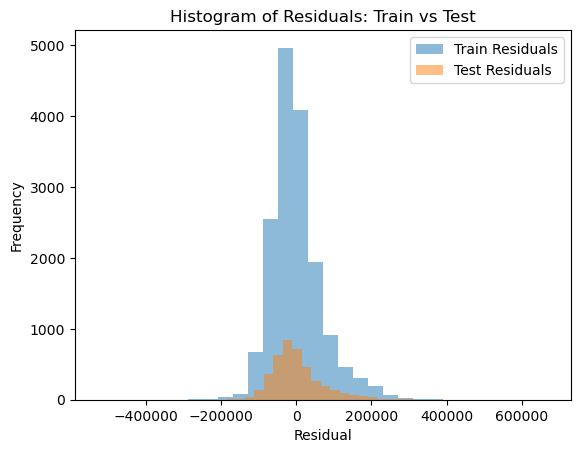

In [12]:
pred_train = [sum(w * xi for w, xi in zip(w_p, xi)) + b_p for xi in X_train]
pred_test  = pred_p  # from your existing code

# Compute residuals
residuals_train = [yt - yp for yt, yp in zip(y_train, pred_train)]
residuals_test  = [yt - yp for yt, yp in zip(y_test,  pred_test)]

# Plot overlayed histograms
plt.figure()
plt.hist(residuals_train, bins=30, alpha=0.5, label='Train Residuals')
plt.hist(residuals_test,  bins=30, alpha=0.5, label='Test Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals: Train vs Test')
plt.legend()
plt.show()

This histogram suggests that the difference yt-yp in training data is a lot reaching beyond 500000

Numpy approach

In [13]:
# In[5]: NumPy GD w/ Early Stopping
def gradient_descent_np_es(X, y, X_val, y_val,
                           lr=0.01, epochs=1000,
                           patience=20, min_delta=1e-4):
    n, m = X.shape
    w = np.zeros(m); b = 0.0
    best_w, best_b = w.copy(), b
    best_val_loss = float('inf')
    wait = 0
    
    history = {'train_mse':[], 'val_mse':[]}
    
    for epoch in range(epochs):
        y_pred = X.dot(w) + b
        err    = y_pred - y
        dw     = (2/n)*X.T.dot(err)
        db     = (2/n)*err.sum()
        w -= lr*dw; b -= lr*db
        
        train_mse = np.mean(err**2)
        y_val_pred = X_val.dot(w) + b
        val_mse   = np.mean((y_val_pred - y_val)**2)
        
        history['train_mse'].append(train_mse)
        history['val_mse'].append(val_mse)
        
        if val_mse < best_val_loss - min_delta:
            best_val_loss = val_mse
            best_w, best_b = w.copy(), b
            wait = 0
        else:
            wait += 1
        if wait >= patience:
            print(f"NumPy ES stopping at epoch {epoch}")
            break
    
    return best_w, best_b, history

# prepare NumPy arrays
X_train_np = np.array(X_train);  X_val_np = np.array(X_test)
y_train_np = np.array(y_train);  y_val_np = np.array(y_test)

start = time.time()
w_n, b_n, hist_n = gradient_descent_np_es(
    X_train_np, y_train_np, X_val_np, y_val_np,
    lr=0.005, epochs=1000, patience=50
)
print("NumPy GD duration: ", time.time()-start)

pred_n = X_test_np.dot(w_n) + b_n
print("NumPy Test Metrics:",
      f"MSE={mse(y_test,pred_n):.2f}",
      f"MAE={mae(y_test,pred_n):.2f}",
      f"R2={r2(y_test,pred_n):.4f}")


NumPy GD duration:  1.928941011428833
NumPy Test Metrics: MSE=4753658355.19 MAE=50326.38 R2=0.6390


SKlearn approach

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start_sk = time.time()
model.fit(X_train_np, y_train_np)
dur_sk = time.time() - start_sk
pred_sk = model.predict(X_test_np)
print("SKLearn Results (time: %.4fs):" % dur_sk)
print(f"MSE: {mse(y_test, pred_sk):.4f}, MAE: {mae(y_test, pred_sk):.4f}, R2: {r2(y_test, pred_sk):.4f}")

SKLearn Results (time: 0.0164s):
MSE: 4603430235.1727, MAE: 49729.0042, R2: 0.6504


Plots

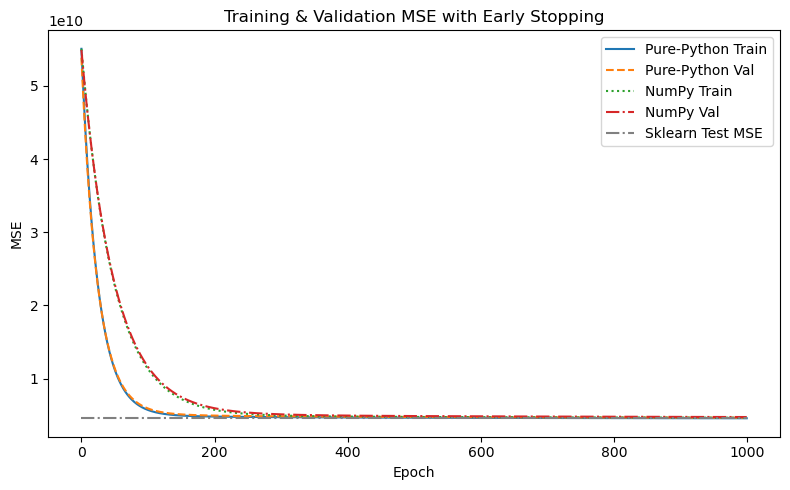

In [15]:
# In[7]: Plot MSE Convergence (Train vs Val)
plt.figure(figsize=(8,5))

# Pure-Python curves
plt.plot(hist_p['train_mse'], label='Pure-Python Train',  linestyle='-')
plt.plot(hist_p['val_mse'],   label='Pure-Python Val',    linestyle='--')

# NumPy curves
plt.plot(hist_n['train_mse'], label='NumPy Train',  linestyle=':')
plt.plot(hist_n['val_mse'],   label='NumPy Val',    linestyle='-.')

# Sklearn test MSE as horizontal
sk_mse = mse(y_test, pred_sk)
plt.hlines(sk_mse, 0, max(len(hist_p['train_mse']), len(hist_n['train_mse']))-1,
           colors='gray', linestyles='dashdot', label='Sklearn Test MSE')

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training & Validation MSE with Early Stopping')
plt.legend()
plt.tight_layout()
plt.show()


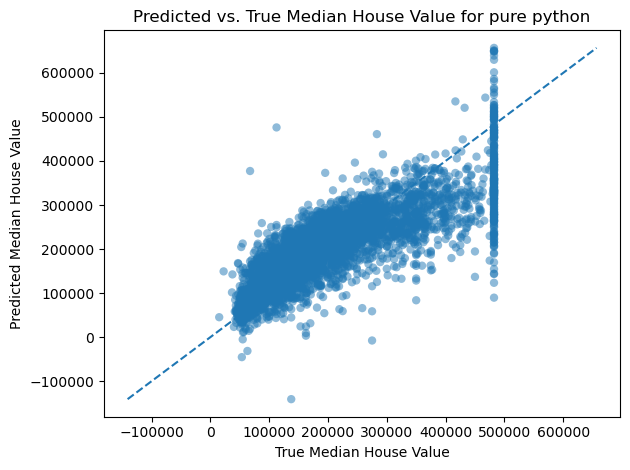

In [16]:
y_true = y_test
y_pred = pred_p   # or pred_n, or pred_sk

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='none')

min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. True Median House Value for pure python')

plt.tight_layout()
plt.show()


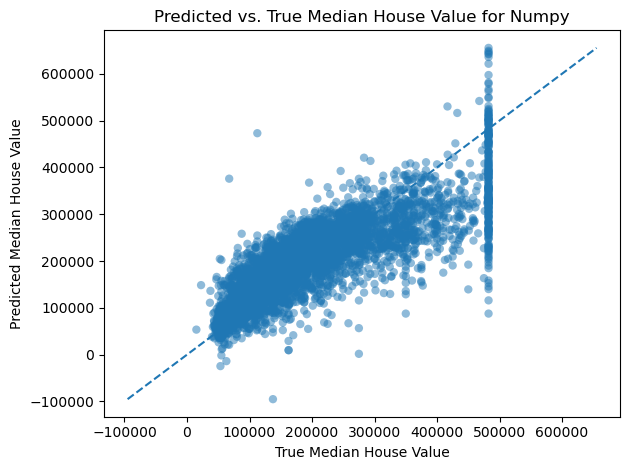

In [17]:
y_true = y_test
y_pred = pred_n   # or pred_sk

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='none')

min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. True Median House Value for Numpy')

plt.tight_layout()
plt.show()


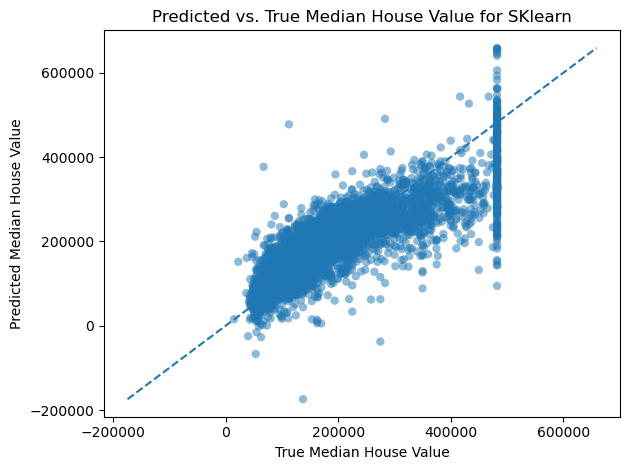

In [18]:
y_true = y_test
y_pred = pred_sk

plt.figure()
plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='none')

min_val = min(min(y_true), min(y_pred))
max_val = max(max(y_true), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. True Median House Value for SKlearn')

plt.tight_layout()
plt.show()


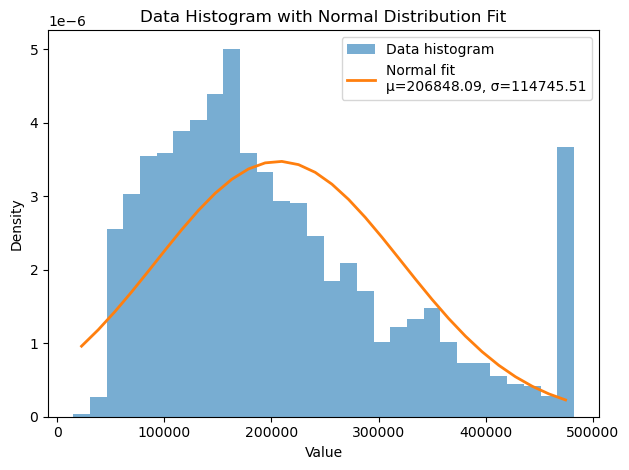

In [19]:
import scipy.stats as stats  # only for the PDF function

data = np.array(y_test)   

# 1) Compute its mean and standard deviation
mu, sigma = data.mean(), data.std(ddof=0)

# 2) Plot the histogram (normalized to form a density)
plt.figure()
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6,
                          label='Data histogram')

# 3) Compute the normal PDF over the bin centers
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers, loc=mu, scale=sigma)

# 4) Plot the normal curve
plt.plot(bin_centers, pdf, linewidth=2, label=f'Normal fit\nμ={mu:.2f}, σ={sigma:.2f}')

# 5) Labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Data Histogram with Normal Distribution Fit')
plt.legend()
plt.tight_layout()
plt.show()
